In [5]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/42.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 406.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.5 MB 919.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 901.1 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 952.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 981.9 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 981.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 793.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 833.5 kB/s eta 0:00:02

In [7]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 142.6 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/300.2 kB 277.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 27

In [9]:
#Importing Necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import wordcloud
import warnings
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
%matplotlib inline
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#Importing the dataset:
file_path = 'data.csv'
df = pd.read_csv(file_path, encoding='Windows-1252')
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [11]:
#Basic Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   textID             31015 non-null  object 
 1   text               31014 non-null  object 
 2   sentiment          31015 non-null  object 
 3   Time of Tweet      31015 non-null  object 
 4   Age of User        31015 non-null  object 
 5   Country            31015 non-null  object 
 6   Population -2020   31015 non-null  int64  
 7   Land Area (Kmï¿½)  31015 non-null  float64
 8   Density (P/Kmï¿½)  31015 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.1+ MB


In [12]:
#Converting text object which is float by default to string:
df['text'] = df['text'].astype(str)
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26


In [13]:
print("Sentiment Analysis Dataset: Features")
print("Continunous features: 'text ID, text, Population, Land Area, Density'")
print("Categorical features with value counts:")
print(df['sentiment'].value_counts())
print(df['Time of Tweet'].value_counts())
print(df['Age of User'].value_counts())
print(df['Country'].value_counts())

Sentiment Analysis Dataset: Features
Continunous features: 'text ID, text, Population, Land Area, Density'
Categorical features with value counts:
sentiment
neutral     12548
positive     9685
negative     8782
Name: count, dtype: int64
Time of Tweet
morning    10339
noon       10338
night      10338
Name: count, dtype: int64
Age of User
0-20      5171
21-30     5170
31-45     5170
46-60     5168
60-70     5168
70-100    5168
Name: count, dtype: int64
Country
Afghanistan        169
Ecuador            169
Chile              169
China              169
Colombia           169
                  ... 
Singapore          144
Slovakia           144
Slovenia           144
Solomon Islands    144
Zimbabwe           144
Name: count, Length: 195, dtype: int64


In [14]:
column_name_mapping = {
    "Population -2020": "Population",
    "Land Area (Kmï¿½)": "Land Area",
    "Density (P/Kmï¿½)": "Density",
}

# Rename columns using the rename() method
df = df.rename(columns=column_name_mapping)
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [15]:
#Categorical Encoding of target variable:
df['sentiment'] = df['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,0,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,0,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,2,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,2,noon,60-70,North Korea,25778816,120410.0,214


<Axes: xlabel='Density', ylabel='sentiment'>

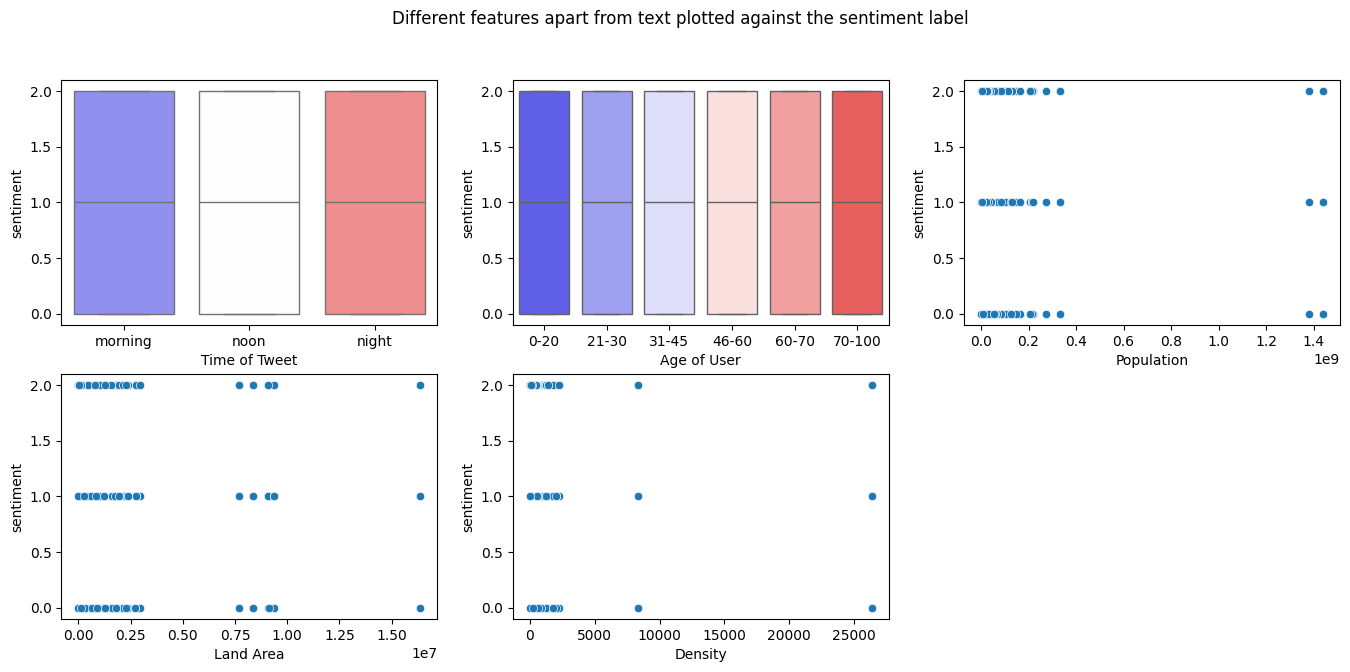

In [16]:
#Visualize target variable against other features:
#check for outliers
figure, axes = plt.subplots(2, 3, figsize = (16.5, 7))
figure.suptitle("Different features apart from text plotted against the sentiment label")
figure.delaxes(axes[1][2])

sns.boxplot(ax = axes[0, 0], data = df, x = "Time of Tweet", y = "sentiment", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = df, x = "Age of User", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[0, 2], data = df, x = "Population", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[1, 0], data = df, x = "Land Area", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[1, 1], data = df, x = "Density", y = "sentiment", palette = "bwr")

In [17]:
#Categorical Encoding of Time of Tweet:
df['Time of Tweet'] = df['Time of Tweet'].replace({'morning': 0, 'noon': 1, 'night': 2})
#Replacing Age of User by mean ages:
df['Age of User'] = df['Age of User'].replace({'0-20': 13, '21-30': 25, '31-45': 38, '46-60': 52, '60-70': 65, '70-100': 85})
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26


In [18]:
# Function to detect pattern and remove from text:
def remove_pattern(txt_input, pat):
    r = re.findall(pat, txt_input)
    for word in r:
        txt_input = re.sub(word,"",txt_input)
    return txt_input

In [19]:
# Remove special characters, numbers and other punctuations:
df['processed_text'] = df['text'].str.replace("[^a-zA-Z#]"," ")
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26,"Sons of ****, why couldn`t they put them on t..."


In [20]:
#Converting processed test to lowercase:
df['processed_text'] = df['processed_text'].str.lower()
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60,"i`d have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105,sooo sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26,"sons of ****, why couldn`t they put them on t..."


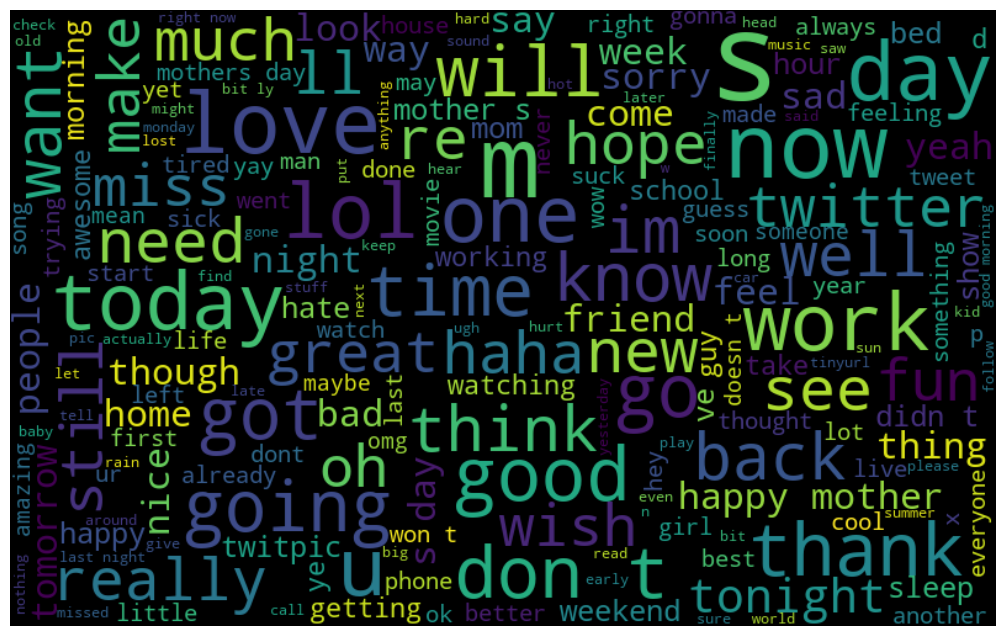

In [21]:
#Visualize the frequent words:
all_words = " ".join([i for i in df['processed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
#Dropping irrelevent features:
X = df.drop(columns=['textID','text','Country','Population','Density','Land Area','sentiment'])
y = df['sentiment']
print(X.head(),y)

   Time of Tweet  Age of User   
0              0           13  \
1              1           25   
2              2           38   
3              0           52   
4              1           65   

                                      processed_text  
0                i`d have responded, if i were going  
1      sooo sad i will miss you here in san diego!!!  
2                          my boss is bullying me...  
3                     what interview! leave me alone  
4   sons of ****, why couldn`t they put them on t...   0        1
1        0
2        0
3        0
4        0
        ..
31010    0
31011    2
31012    0
31013    2
31014    2
Name: sentiment, Length: 31015, dtype: int64


In [23]:
#Train test split:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#Vectorizing Text:

# Convert 'processed_text' column to list of strings
train_texts = x_train['processed_text'].tolist()
test_texts = x_test['processed_text'].tolist()

vectorizer = TfidfVectorizer()
train_matrix = vectorizer.fit_transform(train_texts)
test_matrix = vectorizer.transform(test_texts)

In [25]:
#Converting the other features to numpy arrays and stacking them with the sparse matrices:
train_time_of_tweet = np.array(x_train['Time of Tweet']).reshape(-1, 1)
test_time_of_tweet = np.array(x_test['Time of Tweet']).reshape(-1, 1)
train_age = np.array(x_train['Age of User']).reshape(-1, 1)
test_age = np.array(x_test['Age of User']).reshape(-1, 1)

X_train = sparse.hstack([train_age, train_time_of_tweet, train_matrix])
X_test = sparse.hstack([test_age, test_time_of_tweet, test_matrix])

print(X_train)

  (0, 0)	85.0
  (1, 0)	38.0
  (2, 0)	38.0
  (3, 0)	38.0
  (4, 0)	65.0
  (5, 0)	52.0
  (6, 0)	52.0
  (7, 0)	13.0
  (8, 0)	52.0
  (9, 0)	25.0
  (10, 0)	52.0
  (11, 0)	38.0
  (12, 0)	85.0
  (13, 0)	25.0
  (14, 0)	25.0
  (15, 0)	38.0
  (16, 0)	65.0
  (17, 0)	38.0
  (18, 0)	13.0
  (19, 0)	38.0
  (20, 0)	85.0
  (21, 0)	25.0
  (22, 0)	13.0
  (23, 0)	52.0
  (24, 0)	52.0
  :	:
  (24809, 9248)	0.1232814755961536
  (24809, 11938)	0.11998431424947895
  (24809, 15691)	0.12988272323103867
  (24809, 21619)	0.18444942093315222
  (24809, 21937)	0.08909235115299546
  (24809, 20523)	0.24578353740155628
  (24810, 16838)	0.6912709376085086
  (24810, 14496)	0.674213203021438
  (24810, 21619)	0.2599635506939897
  (24811, 6040)	0.3023996652043084
  (24811, 8915)	0.3023996652043084
  (24811, 7907)	0.2705350230444801
  (24811, 8229)	0.2906393738700232
  (24811, 14368)	0.5812787477400464
  (24811, 21051)	0.23032632139339393
  (24811, 19678)	0.17795726072402193
  (24811, 17332)	0.258774731710195
  (24811, 21664)	

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest classifier with max_depth=500
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get the number of trees in the forest
n_trees = rf_classifier.n_estimators
print("Number of Trees:", n_trees)

# Access individual trees and print their depths
tree_depths = [min(estimator.tree_.max_depth, 10) for estimator in rf_classifier.estimators_]
print("Depths of individual trees:", tree_depths)

# Predict on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print performance metrics
print(classification_report(y_test, predictions))


Accuracy: 0.6650008060615831
Number of Trees: 100
Depths of individual trees: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Confusion Matrix:
[[ 809  885   71]
 [ 170 2107  272]
 [  54  626 1209]]
              precision    recall  f1-score   support

           0       0.78      0.46      0.58      1765
           1       0.58      0.83      0.68      2549
           2       0.78      0.64      0.70      1889

    accuracy                           0.67      6203
   macro avg       0.71      0.64      0.65      6203
weighted avg       0.70      0.67      0.66      6203



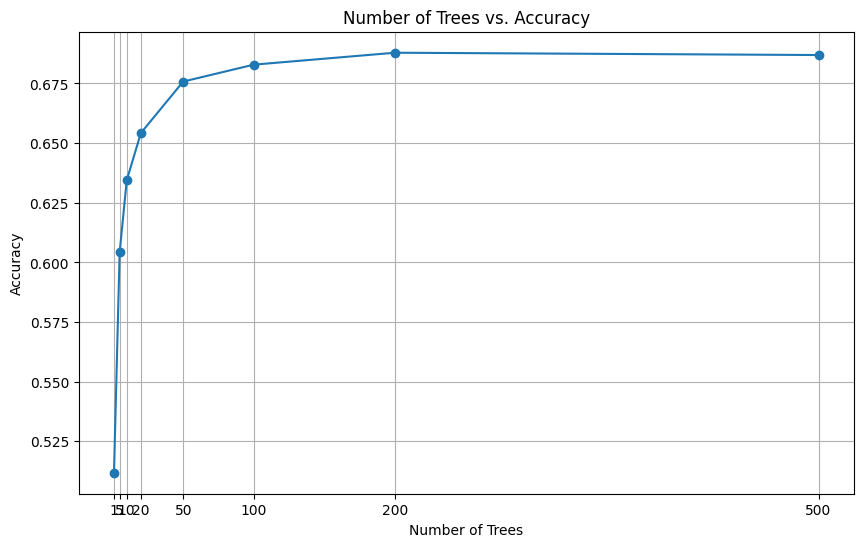

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of number of trees to try
n_trees_range = [1, 5, 10, 20, 50, 100, 200, 500]

# Initialize lists to store accuracies
accuracies = []

# Iterate over each number of trees
for n_trees in n_trees_range:
    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    predictions = rf_classifier.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, accuracies, marker='o')
plt.title('Number of Trees vs. Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(n_trees_range)
plt.grid(True)
plt.show()
